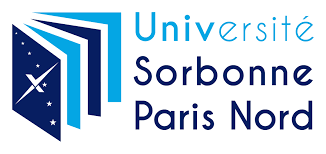

  <div style="text-align: center;">
 <h1  style="color:#FFF;font-style:italic; background-color:#34ace0;width:850px;border:2px solid #dfe6e9;border-radius:10px 10px 10px 10px ;height:35px;box-shadow:1px 1px 1px black; margin-left:3%; "> Exploration Informatique des Données et Décisionnel</h1> 
    </div>

 <h1  style="color :#0D47A1;font-style:italic;font-size:275%;height:40px;width:600px;box-shadow:3px 3px 5px black;margin-left:90px;padding-left:50px;margin-bottom:50px;margin-top:30px;"> Statistique Exploratoire</h1> 

 <h1  style="color :indigo;font-style:italic;font-size:150%;height:330px;width:600px;box-shadow:3px 3px 5px black;margin-left:180px;padding-left:50px;margin-bottom:20px;margin-top:30px;"> Projet réalisé par : <br><br>
    - Cheikh Ahmadou Bamba DIOP <br><br>
    - Amadou NGAM <br><br>
    - Serigne Abdou Lat SARR <br><br>
    - Mamadou KANE <br><br>
    - Mohamed Bobo DIALLO <br><br>
    - Souleymane ANDICH <br><br>
    - Khalifa OUATTARA

</h1>   

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import scipy.stats
from sklearn import datasets
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.model_selection import cross_val_score, train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, pairwise_distances
from matplotlib import ticker
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import MinMaxScaler, StandardScaler , FunctionTransformer
from sklearn import metrics, cluster

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.datasets import make_swiss_roll
from sklearn.impute import SimpleImputer

from scipy.signal import medfilt
from tkinter import *
from functools import partial
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from collections import Counter
from sklearn.decomposition import PCA


In [2]:
# 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### Description des données

In [4]:
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6.234000e+03,6234,6234,4265,5664,5758,6223,6234.00000,6224,6234,6234,6234
unique,NaN,2,6172,3301,5469,554,1524,NaN,14,201,461,6226
top,NaN,Movie,The Silence,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,NaN,4265,3,18,18,2032,122,NaN,2027,1321,299,3
mean,7.670368e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.35932,NaN,NaN,NaN,NaN
std,1.094296e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.81162,NaN,NaN,NaN,NaN
min,2.477470e+05,NaN,NaN,NaN,NaN,NaN,NaN,1925.00000,NaN,NaN,NaN,NaN
25%,8.003580e+07,NaN,NaN,NaN,NaN,NaN,NaN,2013.00000,NaN,NaN,NaN,NaN
50%,8.016337e+07,NaN,NaN,NaN,NaN,NaN,NaN,2016.00000,NaN,NaN,NaN,NaN
75%,8.024489e+07,NaN,NaN,NaN,NaN,NaN,NaN,2018.00000,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


### b Analyse descriptive

In [6]:
#Définir les années affichées:
years = list(range(2008,2020,1))

#films et séries télé séparés:
movie_rows = df.loc[df["type"] == "Movie"]
tv_rows = df.loc[df["type"] == "TV Show"]

#Compter les films / émissions de télévision par ans
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#sélectionner des films / émissions de télévision entre les années choisies:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

# Calculer les pourcentages de films et emissions:
movies_per = round(movie_rows.shape[0] / df["type"].shape[0] * 100, 2)
tvshows_per = round(tv_rows.shape[0] / df["type"].shape[0] * 100, 2)

#Calculer les pourcentages de films et d'émissions de télévision:
top5_producer_countrys = df.country.value_counts().sort_values(ascending=False).head(5)

#Acteurs et réalisateurs les plus populaires (films et émissions de télévision):
casts = ", ".join(df.copy().fillna("")['cast']).split(", ")
counter_list = Counter(casts).most_common(5)
most_commen_actors = [i for i in counter_list if i[0] != ""]
labels = [i[0] for i in most_commen_actors][::-1]
values = [i[1] for i in most_commen_actors][::-1]

most_commen_directors = df.director.value_counts().head(5).sort_values(ascending=True)


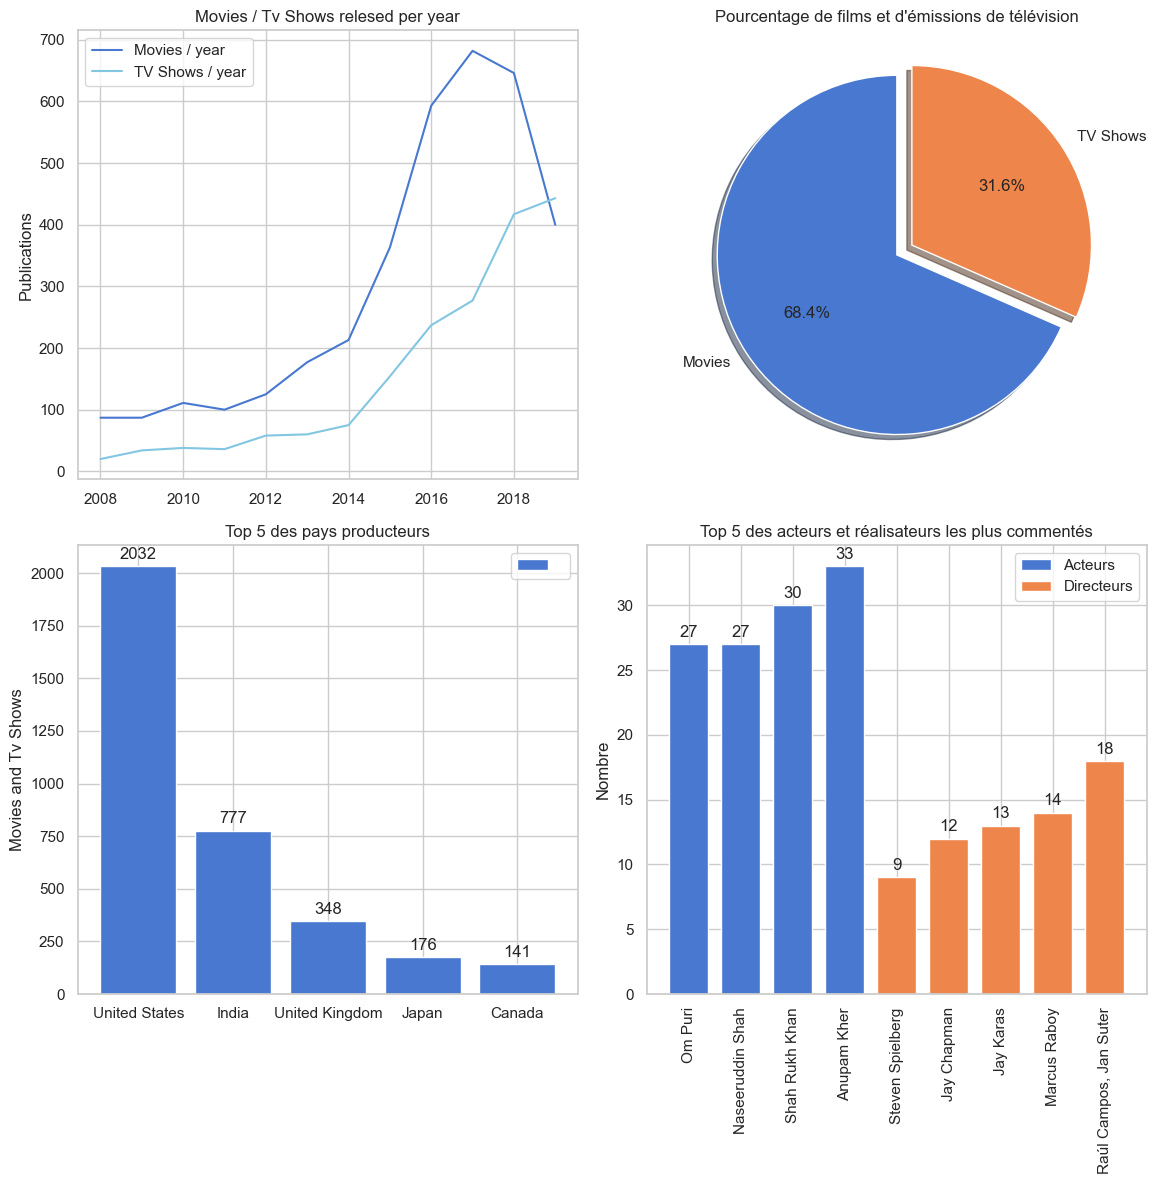

In [8]:
width = 0.75
sns.set(font_scale=1.5)

sns.set(style="whitegrid", palette="muted", color_codes=True)

def autolabel(rects, axes):
    for rect in rects:
        height = rect.get_height()
        axes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# Configurer la figurine matplotlib
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False)

#Graphique linéaire des films et émissions de télévision diffusés par Netflix par ans 
sns.lineplot(data=movies, color="b", ax=axes[0, 0], label="Movies / year")
sns.lineplot(data=tv_shows, color="c", ax=axes[0, 0], label="TV Shows / year")

# Diagramme à secteurs des pourcentages de type
axes[0, 1].pie([movies_per, tvshows_per], explode=(0, 0.1,), labels=["Movies", "TV Shows"], autopct='%1.1f%%',
        shadow=True, startangle=90)

# Diagramme à barres des 5 principaux pays producteurs d'émissions de cinéma / télévision:
rects1 = axes[1, 0].bar(top5_producer_countrys.index, top5_producer_countrys.values,)

autolabel(rects1, axes[1, 0])

#Diagramme à barres des 5 acteurs et réalisateurs les plus commentés:
rects2 = axes[1, 1].bar(labels, values, width, label='Acteurs',)

rects3 = axes[1, 1].bar(most_commen_directors.index, most_commen_directors.values, width, label='Directeurs')

autolabel(rects2, axes[1, 1])
autolabel(rects3, axes[1, 1])

axes[0, 0].set_ylabel('Publications')
axes[0, 0].set_title('Movies / Tv Shows relesed per year')

axes[0, 1].set_title('Pourcentage de films et d\'émissions de télévision')

axes[1, 0].set_ylabel('Movies and Tv Shows')
axes[1, 0].set_title('Top 5 des pays producteurs')
axes[1, 0].legend(" ")

axes[1, 1].set_ylabel('Nombre')
axes[1, 1].set_xticklabels(labels + list(most_commen_directors.index), rotation="vertical")
axes[1, 1].set_title('Top 5 des acteurs et réalisateurs les plus commentés')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('output.png')
plt.show()

### Prétraitements

In [9]:
### copions le dataframe pour appliquer les prétraitements
df_copy = df.copy()

In [10]:
###les valeurs nulles
df_copy.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

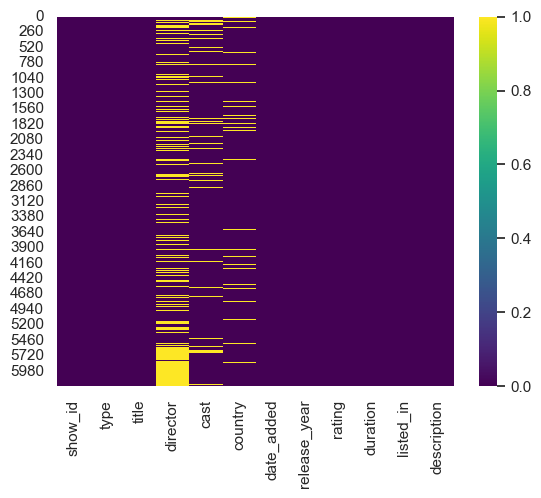

In [11]:
sns.heatmap(df.isnull(),cmap = 'viridis')

A partir du Heatmap et du tableau, nous pouvons voir qu'il y a pas mal de valeurs nulles dans l'ensemble de données. Il y a un total de 3036 valeurs nulles sur l'ensemble de l'ensemble de données avec 1969 points manquants sous «directeur», 570 sous «cast», 476 sous «pays», 11 sous «date_added» et 10 sous «notation».

In [12]:
df_copy['rating'] = df_copy['rating'].fillna('UR')

In [13]:
### Nous remplirons les valeurs NA dans la colonne «pays» avec «Undefined».

In [14]:
df_copy['country'] =df_copy['country'].fillna('Undefined')

In [15]:
### Nous remplirons les valeurs NA dans la colonne "cast" par No Cast

In [16]:
df_copy['cast'].fillna('No Cast', inplace=True)

La colonne director comporte beaucoup trop de valeurs manquantes mais nous ne pouvons pas nous permettre de la supprimer car elle nous sera utile dans notre analyse de ce fait on va remplacer les valeurs manquantes par "No Director"

In [17]:
df_copy['director'].fillna('No Director', inplace=True)

In [18]:
df_copy.dropna(subset=['date_added'],inplace=True)

In [19]:
### valeurs uniques
df_copy.nunique()

show_id         6223
type               2
title           6162
director        3302
cast            5460
country          555
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6215
dtype: int64

In [20]:
### valeurs dupliquées
df_copy.duplicated().sum()

0

In [21]:
df_copy.shape

(6223, 12)

In [22]:
df_copy.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [23]:
# Fonction pour nettoyer et parser les dates
def parse_date(date_str):
    if pd.isna(date_str):
        return None
    try:
        return pd.to_datetime(date_str.strip(), format='%B %d, %Y', errors='coerce')
    except ValueError:
        return None

Afin de visualiser le pays et les genres des films, nous devons d'abord nettoyer les colonnes et les ramener dans un format uniforme.

En examinant de plus près l'ensemble de données, nous voyons que l'espacement des virgules dans certains cas est différent de celui d'autres

In [24]:
# Élimination des caractères spéciaux
df_copy['title'] = df_copy['title'].str.replace(r'[^a-zA-Z0-9]', '', regex=True)

In [25]:
#prétraitement
### conversion de la date en format datetime
df_copy["date_added"] = pd.to_datetime(df_copy['date_added'].apply(parse_date))
df_copy['day_added'] = df_copy['date_added'].dt.day
df_copy['year_added'] = df_copy['date_added'].dt.year
df_copy['month_added']=df_copy['date_added'].dt.month
df_copy['year_added'].astype(int);
df_copy['day_added'].astype(int);

In [26]:
#prétraitement
###remplacer les virgules et les espaces
df_copy['country'] = df_copy.country.str.replace(", | ,", ",")
df_copy['listed_in'] =df_copy.listed_in.str.replace(", | ,", ",")

In [27]:
#prétraitement
duree=[]
for i in df_copy['duration'].values:
    v=float(i.split(" ")[0])
    duree.append(v)

In [28]:
df_copy['duration'] = duree

In [29]:
df_copy['rating'].value_counts()

TV-MA       2025
TV-14       1695
TV-PG        699
R            508
PG-13        286
NR           217
PG           184
TV-Y7        168
TV-G         149
TV-Y         142
TV-Y7-FV      95
G             37
UR            16
NC-17          2
Name: rating, dtype: int64

In [30]:
invalied = ['74 min' , '84 min' , '66 min']
df_copy =  df_copy[~df_copy['rating'].isin(invalied)]

In [31]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df_copy['rating'].replace(rating_map, inplace = True)
df_copy['rating'].unique()

array(['Older Kids', 'Adults', 'Young Adults', 'Kids', 'Teens'],
      dtype=object)

In [32]:
df_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,NormoftheNorthKingSizedAdventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States,India,South Korea,China",2019-09-09,2019,Older Kids,90.0,"Children & Family Movies,Comedies",Before planning an awesome wedding for his gra...,9,2019,9
1,80117401,Movie,JandinoWhateveritTakes,No Director,Jandino Asporaat,United Kingdom,2016-09-09,2016,Adults,94.0,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,2016,9
2,70234439,TV Show,TransformersPrime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,Older Kids,1.0,Kids' TV,"With the help of three human allies, the Autob...",8,2018,9
3,80058654,TV Show,TransformersRobotsinDisguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,Older Kids,1.0,Kids' TV,When a prison ship crash unleashes hundreds of...,8,2018,9
4,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,Young Adults,99.0,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9


### visualisation des données après prétraitements


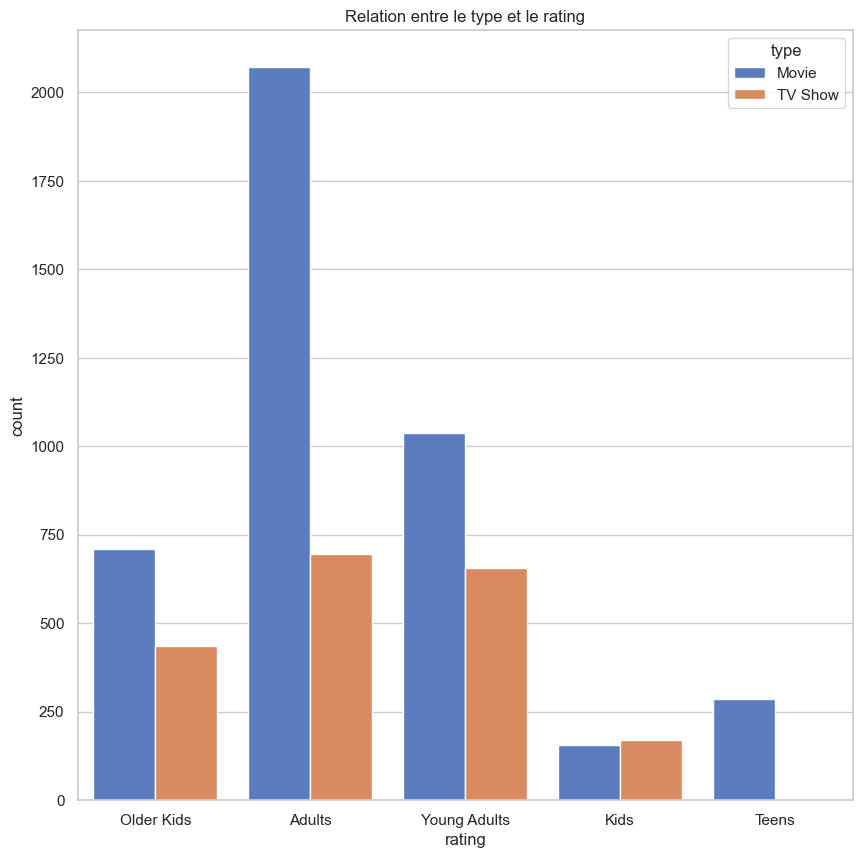

In [33]:
### Relation entre le type et le rating
plt.figure(figsize=(10,10))
sns.countplot(x='rating',hue='type',data=df_copy)
plt.title('Relation entre le type et le rating')
plt.show()


### Movies dataset

In [34]:
movies_df = df_copy[df_copy['type'] == 'Movie']
movies_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,NormoftheNorthKingSizedAdventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States,India,South Korea,China",2019-09-09,2019,Older Kids,90.0,"Children & Family Movies,Comedies",Before planning an awesome wedding for his gra...,9,2019,9
1,80117401,Movie,JandinoWhateveritTakes,No Director,Jandino Asporaat,United Kingdom,2016-09-09,2016,Adults,94.0,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,2016,9
4,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,Young Adults,99.0,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria,United States,Spain,Canada",2017-09-08,2014,Adults,110.0,"International Movies,Sci-Fi & Fantasy,Thrillers","In a dystopian future, an insurance adjuster f...",8,2017,9
7,80164077,Movie,FabrizioCopanoSolopiensoenmi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,Adults,60.0,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,2017,9


In [35]:
movies_df.columns = ['show_id', 'type','title','director','cast','country','date_added','release_year','rating',
                 'duration','listed_in','description','day_added','year_added','month_added']

In [36]:
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,NormoftheNorthKingSizedAdventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States,India,South Korea,China",2019-09-09,2019,Older Kids,90.0,"Children & Family Movies,Comedies",Before planning an awesome wedding for his gra...,9,2019,9
1,80117401,Movie,JandinoWhateveritTakes,No Director,Jandino Asporaat,United Kingdom,2016-09-09,2016,Adults,94.0,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,2016,9
4,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,Young Adults,99.0,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria,United States,Spain,Canada",2017-09-08,2014,Adults,110.0,"International Movies,Sci-Fi & Fantasy,Thrillers","In a dystopian future, an insurance adjuster f...",8,2017,9
7,80164077,Movie,FabrizioCopanoSolopiensoenmi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,Adults,60.0,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,2017,9


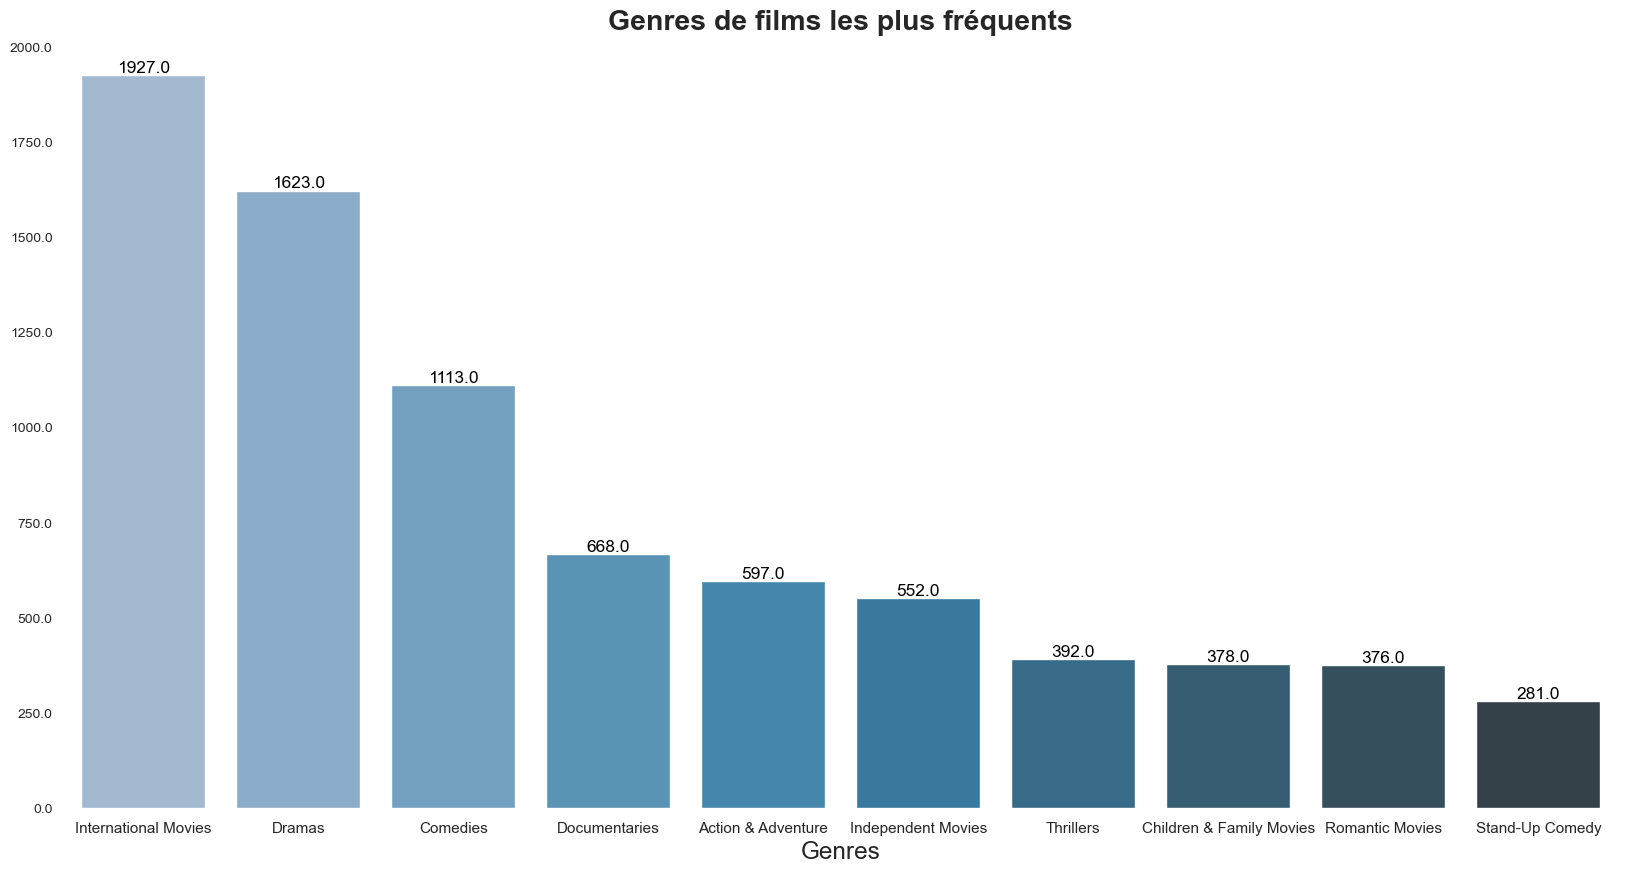

In [37]:
plt.figure(figsize=(20,10))
sns.set(style="white")

movies_genre_df = pd.DataFrame(movies_df.listed_in.str.split(',').tolist(), index=movies_df.show_id).stack()
movies_genre_df = movies_genre_df.reset_index([0, 'show_id'])
movies_genre_df.columns = ['show_id', 'genre']

#countplot
ax = sns.countplot(x="genre", data=movies_genre_df, palette="PuBu_d", order=movies_genre_df.genre.value_counts().iloc[:10].index)

#l'esthétique du tracé
ax.grid(False)
ax.set_yticklabels(ax.get_yticks(), size = 10)
sns.despine(bottom = True, left = True)
plt.title('Genres de films les plus fréquents', fontsize = 20.5, fontweight = 'bold')
plt.xlabel('Genres', fontsize = 17.5)
plt.ylabel('')

# Annotating the count values on each bar
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12.5, color='black', xytext=(0, 5), textcoords='offset points')


### Analyse de la durée des films

In [38]:
movies_df['duration']

0        90.0
1        94.0
4        99.0
6       110.0
7        60.0
        ...  
5575    106.0
5577     70.0
5578    102.0
5579     88.0
5580    109.0
Name: duration, Length: 4264, dtype: float64

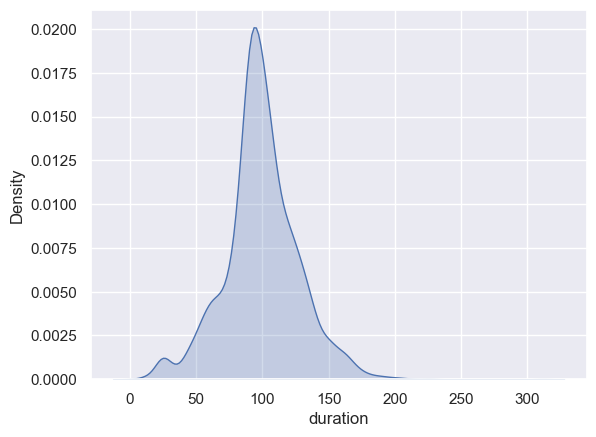

In [39]:
plt.figure()
sns.set(style="darkgrid")
sns.kdeplot(data=movies_df['duration'], shade=True)
plt.show()

Ainsi, une bonne quantité de films sur Netflix ont une durée de 75 à 120 minutes. C'est acceptable compte tenu du fait qu'une bonne partie du public ne peut pas regarder un film de 3 heures en une seule séance.

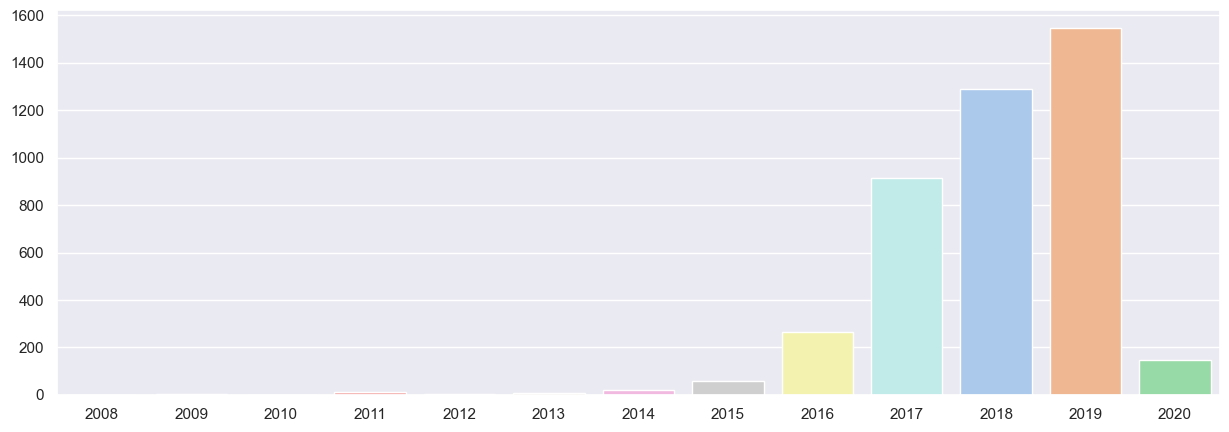

In [40]:
plt.figure(figsize=(15, 5))

ax = sns.barplot(
    x = movies_df['year_added'].value_counts().keys(), 
    y = movies_df['year_added'].value_counts().values,
    palette="pastel"

)
plt.show()

On voit que le contenu de cette plateforme a augmenté chaque année. Nous constatons également une forte augmentation du nombre de films ajoutés en 2017 par rapport à 2016. Le nombre de films a connu une très forte augmentation de 2016 à 2019.

### Un regard génial sur la façon dont les films ont été ajoutés au fil des ans

In [41]:
movies_genrewise_df = movies_df[['show_id', 'year_added']]
movies_genrewise_df = pd.merge(movies_genre_df, movies_genrewise_df, on='show_id')

In [42]:
movies_genrewise_df = movies_genrewise_df.groupby(['year_added', 'genre']).size().reset_index(name='count')

In [43]:
genre_list = ['International Movies','Dramas','Comedies','Documentaries','Action & Adventure', 'Independent Movies', 'Thrillers','Children & Family Movies', 'Romantic Movies', 'Stand-Up Comedy' ]
movies_genrewise_df = movies_genrewise_df[movies_genrewise_df['genre'].isin(genre_list)]

<Figure size 2000x2000 with 0 Axes>

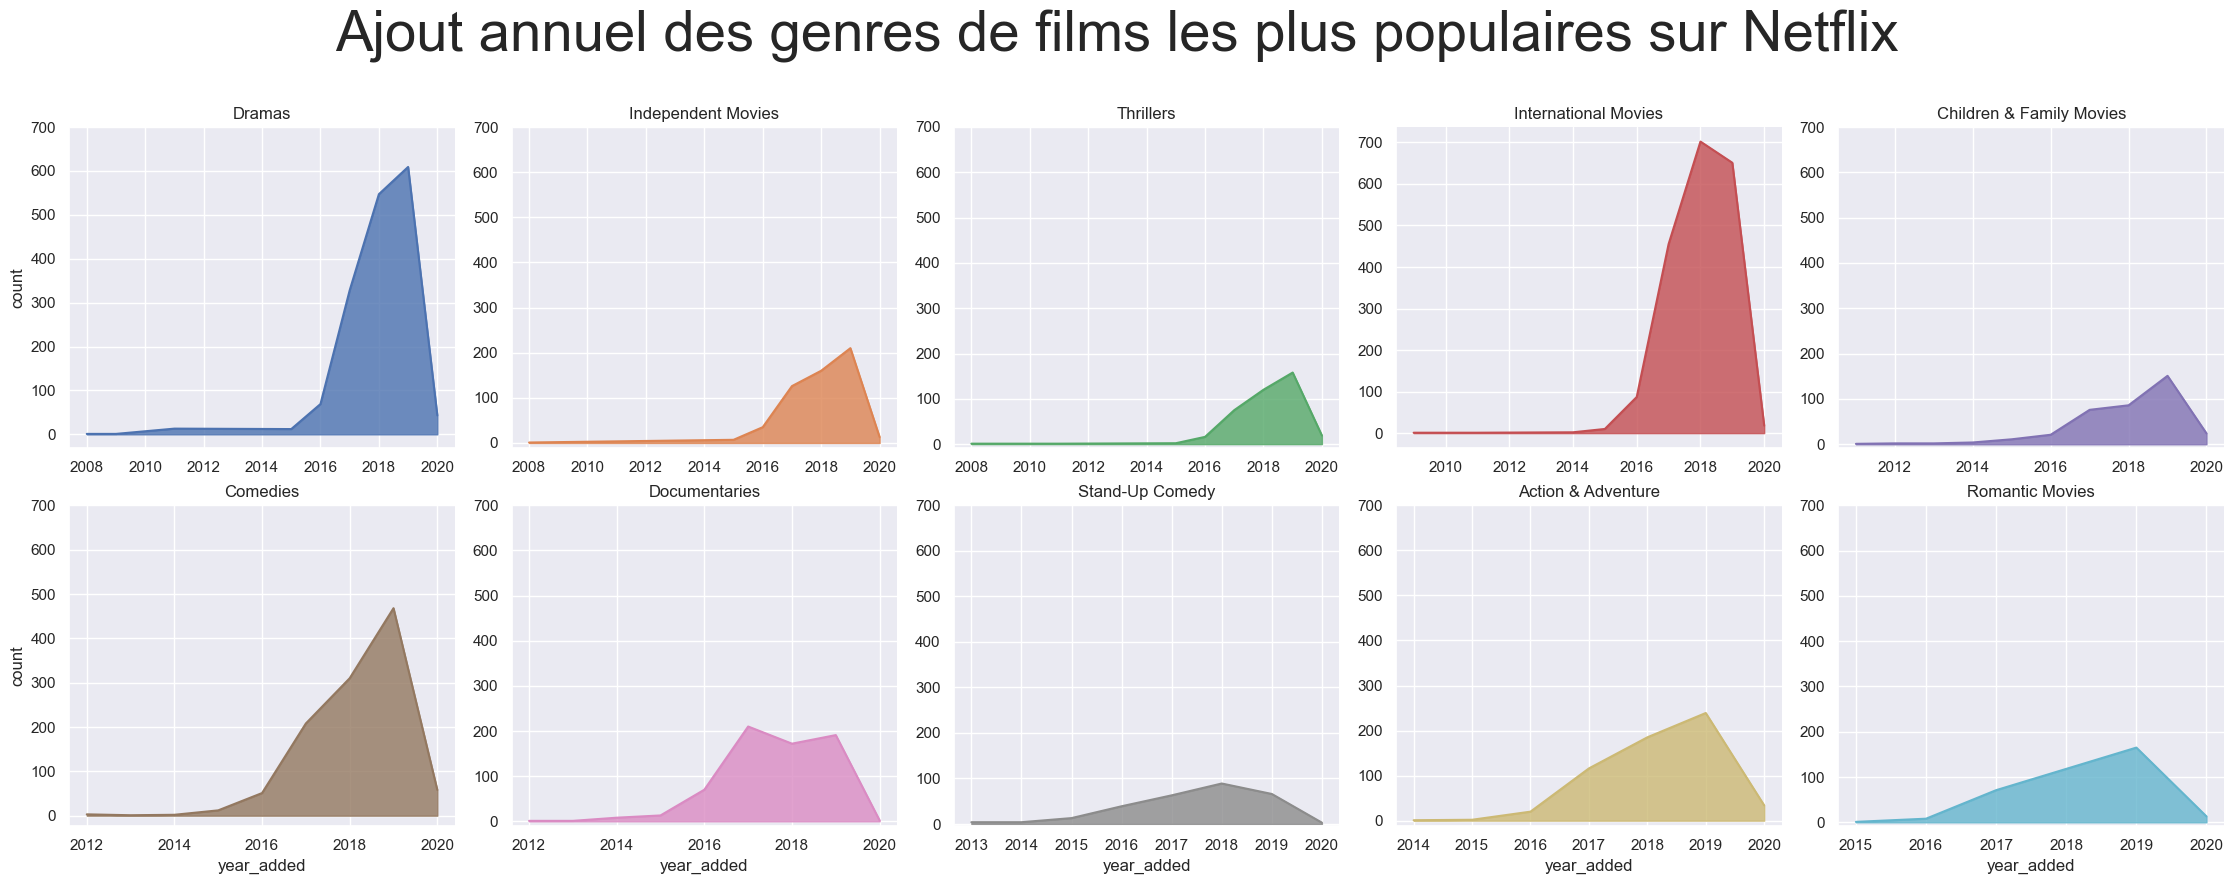

In [44]:
plt.figure(figsize=(20,20))
g = sns.FacetGrid(movies_genrewise_df, col= 'genre', hue='genre', col_wrap=5, height = 4.5, aspect = 1.0, sharex=False, sharey = False)
g = g.map(plt.plot, 'year_added', 'count')
g = g.map(plt.fill_between, 'year_added', 'count', alpha=0.8)
g = g.set_titles("{col_name}")
g = g.set(yticks = np.arange(0,800,100))


plt.subplots_adjust(top=0.85)
g.fig.suptitle('Ajout annuel des genres de films les plus populaires sur Netflix', fontsize = 40.5)
plt.show()

On voit que toutes les catégories ont vu leur nombre augmenter en 2019. On voit que le genre «Films internationaux» a connu ses plus hauts chiffres en 2018 plutôt qu'en 2019 comme les autres genres.

«Dramas», «Independent Movies» et «Thrillers» sont sur Netflix depuis 2008, tandis que des genres comme «Romantics Movies», «Stand-Up Comedy» et «Action & Adventure» semblent être des ajouts assez récents sur Netflix.

### Durée entre la sortie d'un film et son ajout sur Netflix

In [45]:
movies_df['age'] = movies_df['year_added'] - movies_df['release_year']

In [46]:
duration_df = pd.Series(pd.cut(movies_df['age'], np.arange(0,80,5)).value_counts()).reset_index()
duration_df

,index,age
0,"(0, 5]",1854
1,"(5, 10]",469
2,"(10, 15]",262
3,"(15, 20]",145
4,"(20, 25]",111
5,"(25, 30]",52
6,"(35, 40]",39
7,"(30, 35]",33
8,"(40, 45]",27
9,"(45, 50]",15


In [49]:
duration_df = duration_df.rename(columns= {'index': 'counts', 'age':'bins'})
duration_df

,counts,bins
0,"(0, 5]",1854
1,"(5, 10]",469
2,"(10, 15]",262
3,"(15, 20]",145
4,"(20, 25]",111
5,"(25, 30]",52
6,"(35, 40]",39
7,"(30, 35]",33
8,"(40, 45]",27
9,"(45, 50]",15


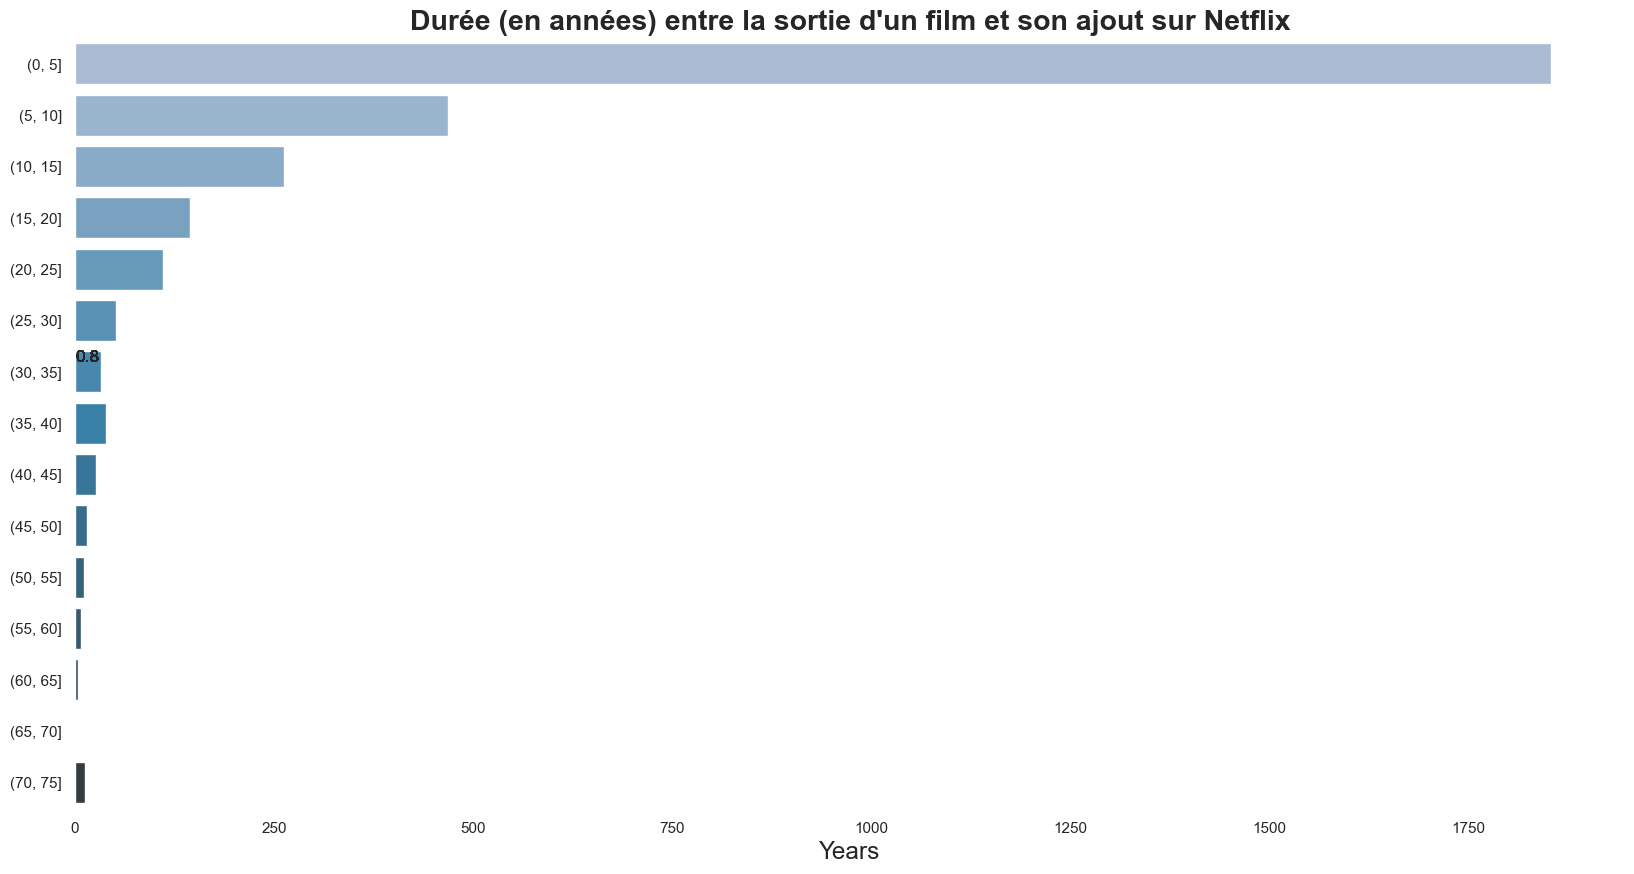

In [50]:
plt.figure(figsize=(20,10))
sns.set(style="white")

ax = sns.barplot(x = duration_df['bins'], y = duration_df['counts'] ,data=duration_df, palette='PuBu_d')

ax.grid(False)
sns.despine(bottom = True, left = True)
plt.title("Durée (en années) entre la sortie d'un film et son ajout sur Netflix", fontsize = 20.5, fontweight = 'bold')
plt.xlabel('Years', fontsize = 17.5)
plt.ylabel('')
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()),(p.get_x()+0.2, p.get_height()+5), fontsize = 12.5)

On observe un fait intéressant sur 13 films âgés de 70 à 75 ans lorsqu'ils ont été ajoutés sur Netflix.

Jetons un coup d'œil à ces films

### Les plus vieux films sur Netflix

In [51]:
movies_df[movies_df.release_year.isin(movies_df['release_year'].nsmallest(5))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,age
2011,60027945,Movie,PreludetoWar,Frank Capra,No Cast,United States,2017-03-31,1942,Older Kids,52.0,"Classic Movies,Documentaries",Frank Capra's documentary chronicles the rise ...,31,2017,3,75
2013,60027942,Movie,TheBattleofMidway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,Kids,18.0,"Classic Movies,Documentaries",Director John Ford captures combat footage of ...,31,2017,3,75
2022,80119186,Movie,UndercoverHowtoOperateBehindEnemyLines,John Ford,No Cast,United States,2017-03-31,1943,Older Kids,61.0,"Classic Movies,Documentaries",This World War II-era training film dramatizes...,31,2017,3,74
2023,70013050,Movie,WhyWeFightTheBattleofRussia,"Frank Capra, Anatole Litvak",No Cast,United States,2017-03-31,1943,Young Adults,82.0,Documentaries,This installment of Frank Capra's acclaimed do...,31,2017,3,74
2026,70022548,Movie,WWIIReportfromtheAleutians,John Huston,No Cast,United States,2017-03-31,1943,Adults,45.0,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,31,2017,3,74


### (d) A l’aide de méthodes de classifications non supervisées dégageons des groupes et ensuite analysons les résultats obtenus.

Maintenant que nous disposons de données finalisées pour les films, je vais entraîner plusieurs modèles de regroupement pour placer chaque film dans un groupe avec d'autres films similaires. Pour ce faire, j'utilise les modèles de regroupement KMeans et DBSCAN.

In [52]:
movies_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,age
0,81145628,Movie,NormoftheNorthKingSizedAdventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States,India,South Korea,China",2019-09-09,2019,Older Kids,90.0,"Children & Family Movies,Comedies",Before planning an awesome wedding for his gra...,9,2019,9,0
1,80117401,Movie,JandinoWhateveritTakes,No Director,Jandino Asporaat,United Kingdom,2016-09-09,2016,Adults,94.0,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,2016,9,0
4,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,Young Adults,99.0,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9,0
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria,United States,Spain,Canada",2017-09-08,2014,Adults,110.0,"International Movies,Sci-Fi & Fantasy,Thrillers","In a dystopian future, an insurance adjuster f...",8,2017,9,3
7,80164077,Movie,FabrizioCopanoSolopiensoenmi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,Adults,60.0,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,2017,9,0


## Determinons les vecteurs  le cluster

### Feature engineering

In [53]:
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,age
0,81145628,Movie,NormoftheNorthKingSizedAdventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States,India,South Korea,China",2019-09-09,2019,Older Kids,90.0,"Children & Family Movies,Comedies",Before planning an awesome wedding for his gra...,9,2019,9,0
1,80117401,Movie,JandinoWhateveritTakes,No Director,Jandino Asporaat,United Kingdom,2016-09-09,2016,Adults,94.0,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,2016,9,0
4,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,Young Adults,99.0,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9,0
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria,United States,Spain,Canada",2017-09-08,2014,Adults,110.0,"International Movies,Sci-Fi & Fantasy,Thrillers","In a dystopian future, an insurance adjuster f...",8,2017,9,3
7,80164077,Movie,FabrizioCopanoSolopiensoenmi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,Adults,60.0,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,2017,9,0


In [54]:
transformed_df = movies_df.copy()

In [55]:
combined_text = transformed_df \
.apply(lambda row: ' '.join(row[['title', 'director', 'cast', 'country', 'description']]), axis=1)

In [56]:
# Step 1: Apply TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

In [57]:
tfidf_matrix.toarray().shape

(4264, 36182)

### Application du LLE

On construit un pipeline  pour à appliquer la technique de réduction de dimensionnalité Locally Linear Embedding (LLE) sur des données ici des données "fictives". 
Pour améliorer la performance de LLE, nous avons intégré successivement des prétraitement.

On notera que j'ai choisi les de genéree aléatoirement des données avec du bruit en utilisant 'make_swiss_roll' de scikit-learn.(vu que LLE est sensible au bruit).

In [59]:
# Génération de données factices (remplacez cela par vos propres données)
X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

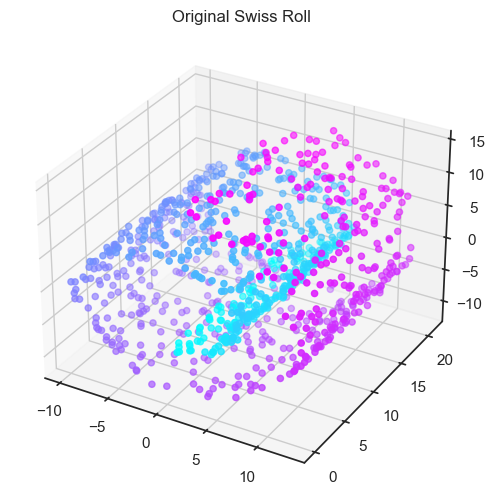

In [60]:
# Plot the original data 

fig = plt.figure(figsize=(6, 6)) 

ax = fig.add_subplot(111, projection='3d') 

ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=y, cmap=plt.cm.cool) 

plt.title('Original Swiss Roll') 
plt.show() 

In [61]:
lle_pipeline1 = Pipeline([
    ('lle', LocallyLinearEmbedding(n_neighbors=10, n_components=2, random_state=42))
])

In [62]:
lle_pipeline1 #pipeline 0

Pipeline(steps=[('lle',
                 LocallyLinearEmbedding(n_neighbors=10, random_state=42))])

In [63]:
X_train_transformed_1 = lle_pipeline1.fit_transform(X_train)

1. Données normalisées avec scaler

In [64]:
# Création du pipeline avec normalisation et LLE
lle_pipeline2 = Pipeline([
    ('scaler', StandardScaler()),            # Étape de normalisation
    ('lle', LocallyLinearEmbedding(n_neighbors=10, n_components=2, random_state=42))
])

# Apprentissage et transformation avec le pipeline
lle_pipeline2.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lle',
                 LocallyLinearEmbedding(n_neighbors=10, random_state=42))])

In [65]:
# Apprentissage et transformation avec le pipeline
X_train_transformed_2 = lle_pipeline2.fit_transform(X_train)

2.Normalisation+ gestions des valeurs manquantes

In [66]:
# Création d'un pipeline avec gestion des valeurs manquantes, normalisation et LLE
model_pipeline3 = Pipeline([
    ('preprocessing', FeatureUnion(transformer_list=[
        ('imputer', SimpleImputer(strategy='mean')),        # Gestion des valeurs manquantes
        ('scaler', StandardScaler()),                        # Normalisation des données
    ])),
    ('lle', LocallyLinearEmbedding(n_neighbors=10, n_components=2, random_state=42)),
    
])

# Entraînement du modèle et prédiction
model_pipeline3.fit(X_train)

Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('imputer', SimpleImputer()),
                                                ('scaler', StandardScaler())])),
                ('lle',
                 LocallyLinearEmbedding(n_neighbors=10, random_state=42))])

In [67]:
X_train_transformed_3 = model_pipeline3.fit_transform(X_train)

3. Normalisation + réduction de bruit + gestions des valeurs manquantes

In [68]:
# Définir une fonction pour la réduction de bruit (ici, médiane mobile)
def reduce_noise(X):
    return medfilt(X, kernel_size=3)

# Création d'un pipeline avec gestion des valeurs manquantes, réduction de bruit, normalisation et LLE
model_pipeline4 = Pipeline([
    ('preprocessing', FeatureUnion(transformer_list=[
        ('imputer', SimpleImputer(strategy='mean')),        # Gestion des valeurs manquantes (remplace ar la moyenne les m v)
        ('reduce_noise', FunctionTransformer(reduce_noise)),  # Réduction de bruit
        ('scaler', StandardScaler()),                        # Normalisation des données
    ])),
    ('lle', LocallyLinearEmbedding(n_neighbors=10, n_components=2, random_state=42))
    
])

# Entraînement du modèle et prédiction
model_pipeline4.fit(X_train)

Pipeline(steps=[('preprocessing',
                 FeatureUnion(transformer_list=[('imputer', SimpleImputer()),
                                                ('reduce_noise',
                                                 FunctionTransformer(func=<function reduce_noise at 0x7f9a3afb29d0>)),
                                                ('scaler', StandardScaler())])),
                ('lle',
                 LocallyLinearEmbedding(n_neighbors=10, random_state=42))])

In [69]:
X_train_transformed_4 = model_pipeline4.fit_transform(X_train)

<u>Justification des preprocess</u><br>
- La normalisation des données peut influencer la sensibilité de LLE aux échelles des différentes caractéristiques. 
-----> Une normalisation appropriée peut garantir que toutes les caractéristiques contribuent de manière équitable à la structure locale préservée par LLE.
- Les valeurs manquantes peuvent affecter la capacité de LLE à capturer la structure locale.
La gestion appropriée des valeurs manquantes peut améliorer la qualité des résultats.
-----> utilise parceque  LLE ne prend pas en charge les valeurs manquantes.La gestion des valeurs manquantes est nécessaire pour garantir que LLE puisse fonctionner correctement.

- La réduction de bruit consiste à atténuer les variations indésirables ou les fluctuations non pertinentes présentes dans les données.La réduction de bruit avant d'effectuer une  Locally Linear Embedding (LLE), vise à éliminer les perturbations qui ne portent pas d'informations significatives sur la structure sous-jacente des données.
----->  La réduction de bruit peut contribuer à améliorer la qualité de la représentation des données en éliminant des variations qui ne sont pas pertinentes

<u>Autres prétraitement (A voir en fonction des besoins et des donnees)</u>
- Transformation Logarithmique ou Power Transform
- Réduction de Dimensionnalité Préliminaire (un ACP)
- Transformation des Catégories (Si ensemble de données contient de variables catégorielles)

sous forme de fonction 

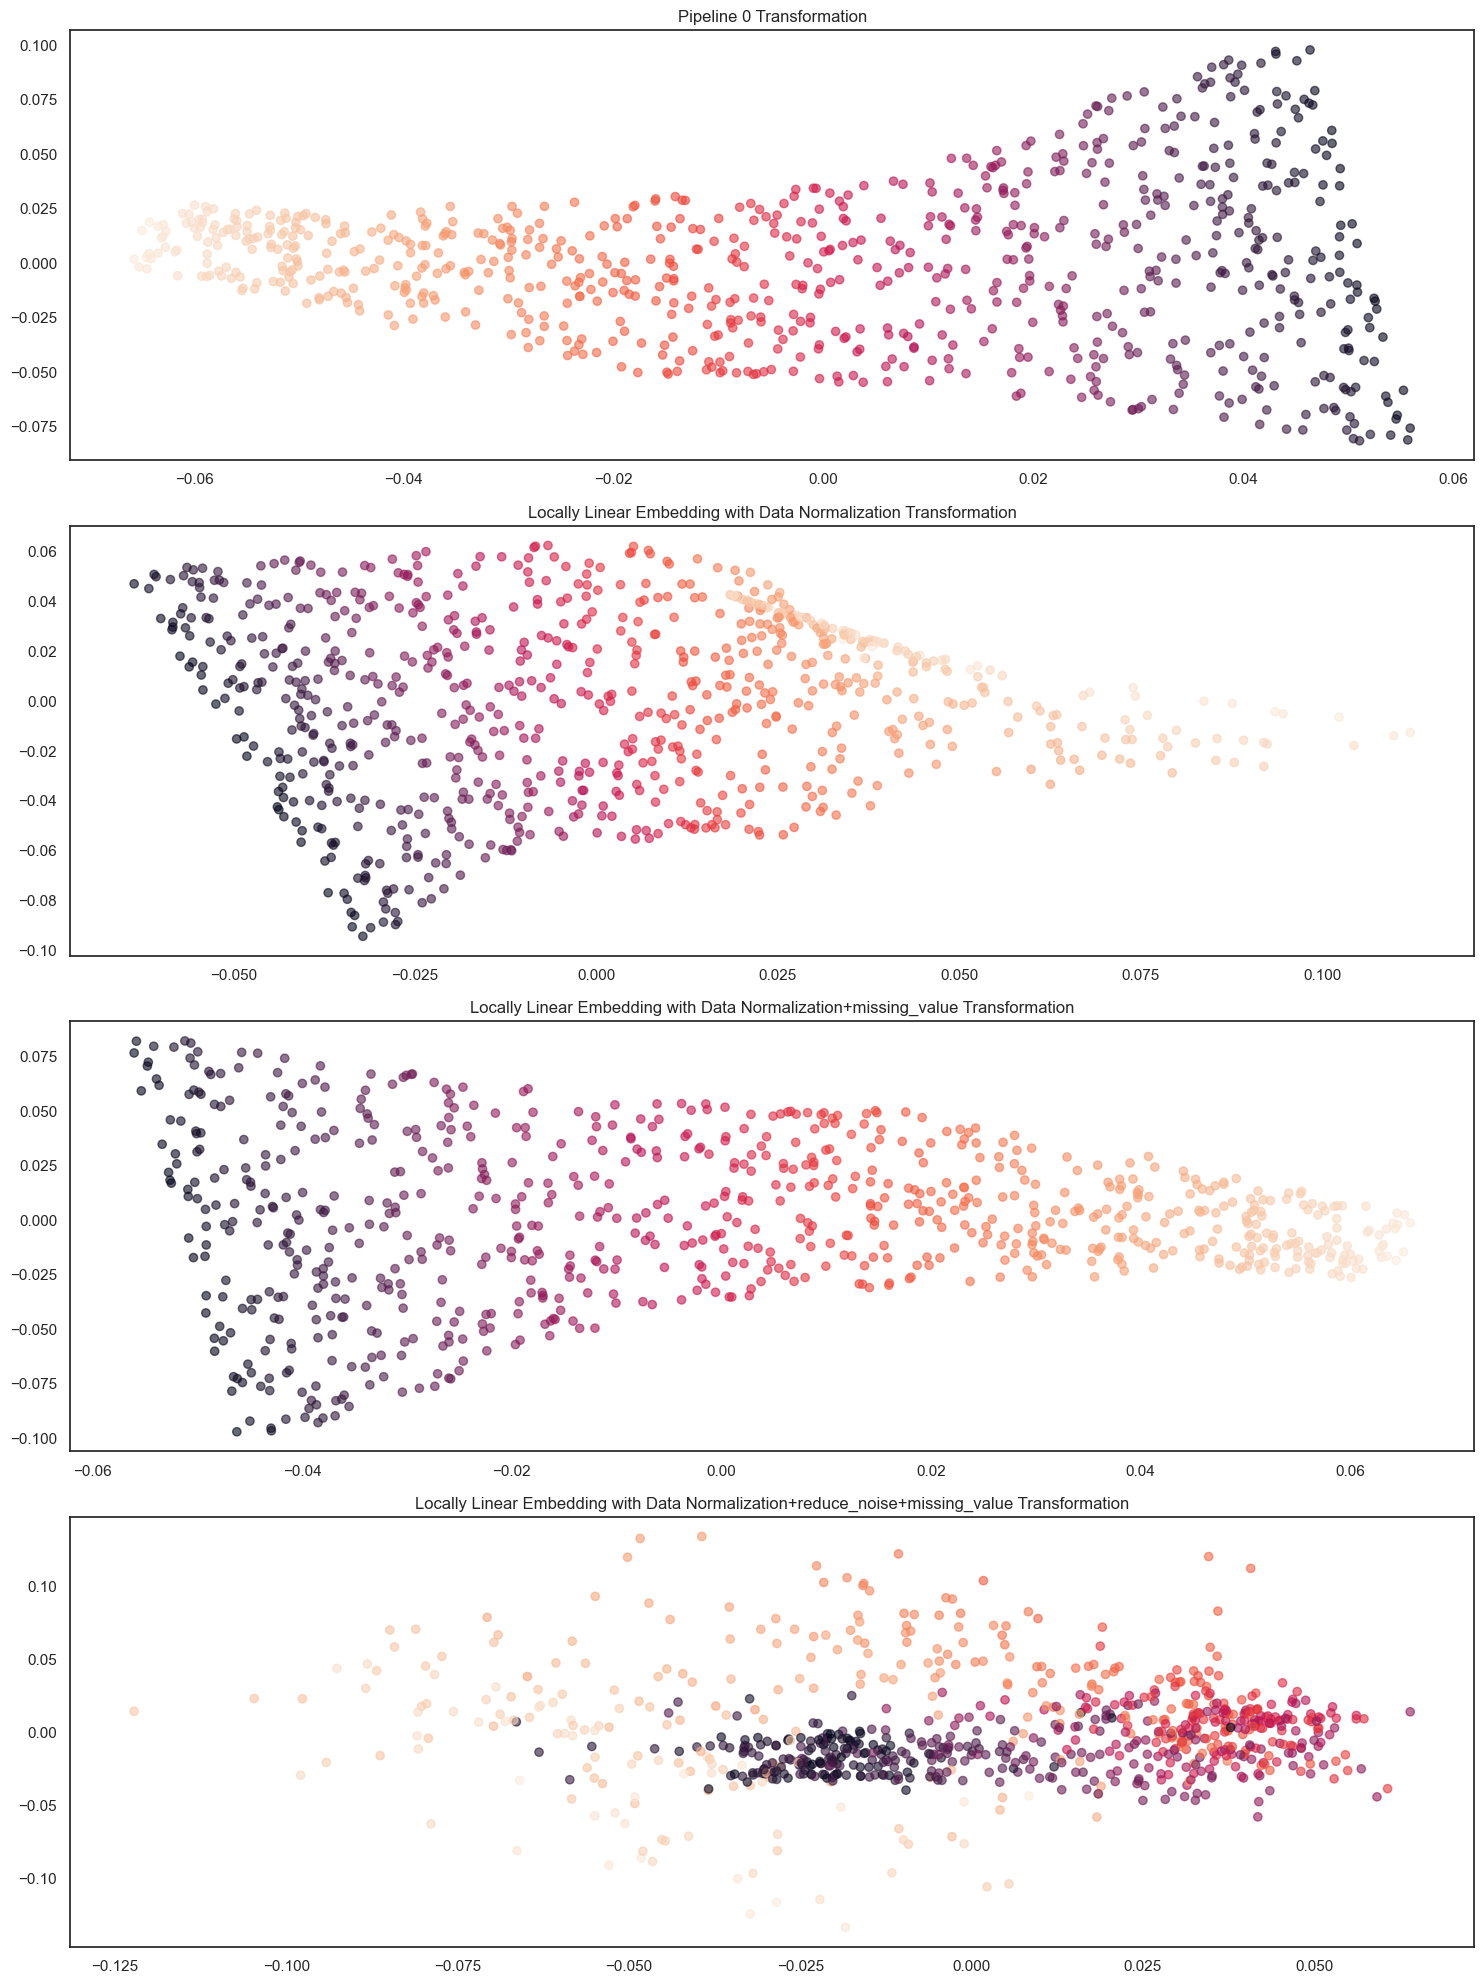

In [329]:
import matplotlib.pyplot as plt

def visualize_transformations(X_train_transformed_list, titles, y):
    num_transformations = len(X_train_transformed_list)

    plt.figure(figsize=(15, 5 * num_transformations))

    for i in range(num_transformations):
        X_transformed = X_train_transformed_list[i]

        plt.subplot(num_transformations, 1, i + 1)
        plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.6, c=y)
        plt.title(f'{titles[i]} Transformation')

    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
visualize_transformations([X_train_transformed_1, X_train_transformed_2, X_train_transformed_3, X_train_transformed_4], ['Pipeline 0', 'Locally Linear Embedding with Data Normalization', 'Locally Linear Embedding with Data Normalization+missing_value', 'Locally Linear Embedding with Data Normalization+reduce_noise+missing_value'],y_train)

In [330]:
# Chargement de l'ensemble de données Iris
iris = datasets.load_iris()
X = iris.data
feature_names = iris.feature_names
target = iris.target

def generate_random_params(param_ranges):
    random_params = {}

    # Sélectionner d'abord n_components et method (si disponible)
    if 'n_components' in param_ranges:
        n_components = random.choice(param_ranges['n_components'])
        random_params['n_components'] = n_components

    if 'method' in param_ranges:
        method = random.choice(param_ranges['method'])
        random_params['method'] = method
    else:
        method = 'standard'
        
    # Calculer la contrainte minimale pour n_neighbors si la méthode est 'hessian'
    min_n_neighbors = None
    if method == 'hessian':
        min_n_neighbors = int(n_components * (n_components + 3) / 2)

    # Sélectionner une valeur pour n_neighbors et ajuster si nécessaire
    if 'n_neighbors' in param_ranges:
        n_neighbors = random.choice(param_ranges['n_neighbors'])

        if min_n_neighbors is not None:
            while n_neighbors < min_n_neighbors:
                n_neighbors = min_n_neighbors + 1

        random_params['n_neighbors'] = n_neighbors

    # Sélectionner les autres paramètres
    for param, values in param_ranges.items():
        if param not in random_params:
            random_params[param] = random.choice(values)

    return random_params


def neighbors_preservation(X, X_transformed):
    
    # Mesurer la préservation des voisins
    neighbors_original = pairwise_distances(X)
    neighbors_reduced = pairwise_distances(X_transformed)
    preservation = np.corrcoef(neighbors_original.ravel(), neighbors_reduced.ravel())[0, 1]
    
    return preservation
    

def evaluate_lle(model, X):
        
    X_transformed = model.fit_transform(X)
    reconstruction_error = model.reconstruction_error_
    neighbor_pres = neighbors_preservation(X, X_transformed)
                
    return reconstruction_error


def calculate_total_iterations(param_distributions):
    """
    Calcule le nombre total d'itérations pour une recherche aléatoire en fonction de la taille
    de l'espace de recherche défini par les distributions de paramètres.

    Parameters:
    - param_distributions (dict): Distributions des paramètres pour la recherche aléatoire.

    Returns:
    - int: Nombre total d'itérations.
    """
    
    total_iterations = 1
    # Pour chaque paramètre dans les distributions
    for values in param_distributions.values():
        # Si les valeurs sont une liste (distribution)
        if isinstance(values, list):
            # Multiplie le nombre total d'itérations par la taille de la liste
            total_iterations *= len(values)
            
    if total_iterations>100:
        total_iterations = 10 
                
    return total_iterations


def grid_search_lle(param_ranges):

    """
    Effectue une recherche sur la grille pour optimiser les paramètres du modèle LLE.

    Parameters:
    - param_ranges (dict): Dictionnaire des plages de valeurs pour les paramètres à optimiser.

    Returns:
    - LocallyLinearEmbedding: Meilleur modèle LLE trouvé avec les paramètres optimisés.
    """
        
    best_reconstruction_error = float('inf')
    best_neighbor_preservation = float('-inf')
    best_params = None
    best_model = None

    total_iterations = calculate_total_iterations(param_ranges)

    # K-Fold Cross-validation
    kf = KFold(n_splits=5)
    
    for _ in range(total_iterations):
        
        params = generate_random_params(param_ranges)
        avg_reconstruction_error = 0
        avg_neighbor_preservation = 0
        
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]

            # Appliquer LLE
            lle = LocallyLinearEmbedding(**params)
            X_train_lle = lle.fit_transform(X_train)
            X_test_lle = lle.transform(X_test)

            reconstruction_error = evaluate_lle(lle, X_train)
            neighbor_pres = neighbors_preservation(X_train, X_train_lle)

            avg_reconstruction_error += reconstruction_error
            avg_neighbor_preservation += neighbor_pres

        avg_reconstruction_error /= 5
        avg_neighbor_preservation /= 5

        if avg_reconstruction_error < best_reconstruction_error or avg_neighbor_preservation > best_neighbor_preservation:
            best_reconstruction_error = avg_reconstruction_error
            best_neighbor_preservation = avg_neighbor_preservation
            best_params = params
            best_model = lle
            
    # Affichage des meilleurs paramètres et de la meilleure performance
    print("Meilleurs paramètres trouvés:", best_params)
    print("Meilleure performance (erreur de reconstruction):", best_reconstruction_error)
    print("Meilleure performance (préservation du voisinage):", best_neighbor_preservation)


    return best_model

In [331]:
# ATTENTION L'EXECUTION PEUT PRENDRE BEAUCOUP DE TEMPS !!!

lle_params_ranges = {
    'n_neighbors': [10, 15, 20, 30],
    'n_components': [2, 3],
    'reg': [1e-5, 1e-4, 1e-3, 1e-2],
    'n_jobs': [-1, 1, 2, 4, 8],
    'method': ['standard', 'hessian', 'modified', 'ltsa'],
    'eigen_solver': ['dense'],
    'tol': [1e-6, 1e-5, 1e-4, 1e-3],
    'max_iter': [100, 500, 1000],
    'neighbors_algorithm': ['auto', 'brute', 'kd_tree', 'ball_tree'],
    'hessian_tol': [1e-6, 1e-5, 1e-4, 1e-3],
    'modified_tol': [1e-6, 1e-5, 1e-4, 1e-3],
}

best_lle_model = grid_search_lle(lle_params_ranges)

Meilleurs paramètres trouvés: {'n_components': 2, 'method': 'hessian', 'n_neighbors': 20, 'reg': 1e-05, 'n_jobs': 1, 'eigen_solver': 'dense', 'tol': 1e-05, 'max_iter': 1000, 'neighbors_algorithm': 'kd_tree', 'hessian_tol': 1e-05, 'modified_tol': 0.001}
Meilleure performance (erreur de reconstruction): 0.02734710659152067
Meilleure performance (préservation du voisinage): 0.6792581974367647


In [332]:
best_params = best_lle_model.get_params()
best_params

{'eigen_solver': 'dense',
 'hessian_tol': 1e-05,
 'max_iter': 1000,
 'method': 'hessian',
 'modified_tol': 0.001,
 'n_components': 2,
 'n_jobs': 1,
 'n_neighbors': 20,
 'neighbors_algorithm': 'kd_tree',
 'random_state': None,
 'reg': 1e-05,
 'tol': 1e-05}

In [333]:
# Pipeline pour LLE
pipeline_lle = Pipeline([
    ('scaling', MinMaxScaler()),
    ('lle', LocallyLinearEmbedding(**best_params)),
])

In [334]:
# Dimensionality Reduction using LLE
reduced_data_lle = pipeline_lle.fit_transform(X)
print(reduced_data_lle.shape)

(150, 2)


In [335]:
pca = PCA()
pca.fit(X)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1 #nombre de diemension pour préserver 95% de la variance

# Pipeline pour ACP
pipeline_acp = Pipeline([
    ('scaling', MinMaxScaler()),
    ('acp', PCA(n_components=d)),
])

In [336]:
# Dimensionality Reduction using ACP
reduced_data_acp = pipeline_acp.fit_transform(X)
print(reduced_data_acp.shape)

(150, 2)


In [337]:
# Appliquer LDA pour la réduction de dimensionnalité
# Pipeline pour 
pipeline_lda = Pipeline([
    ('scaling', MinMaxScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=2)),
])

reduced_data_lda = pipeline_lda.fit_transform(X, target)

In [338]:
### Données de départ
# Convertir en DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = target

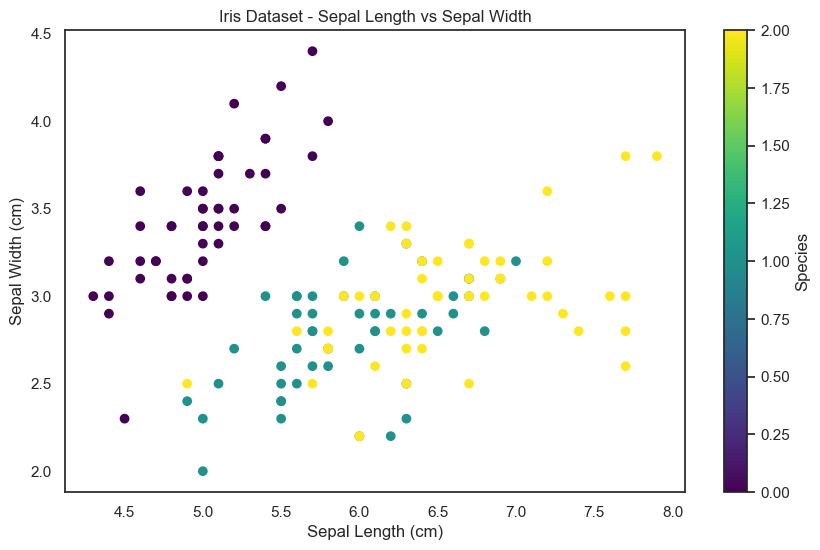

In [339]:
# Import des bibliothèques nécessaires
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
 
# Selecting only the first two features for a simple 2D scatter plot
x = df[feature_names[0]]  # Sepal length
y = df[feature_names[1]]  # Sepal width

# Creating the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, c=target, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Length vs Sepal Width')
plt.colorbar(scatter, label='Species')
plt.show()

### Sélection du nombre de k

### méthode du coude 

#### LLE

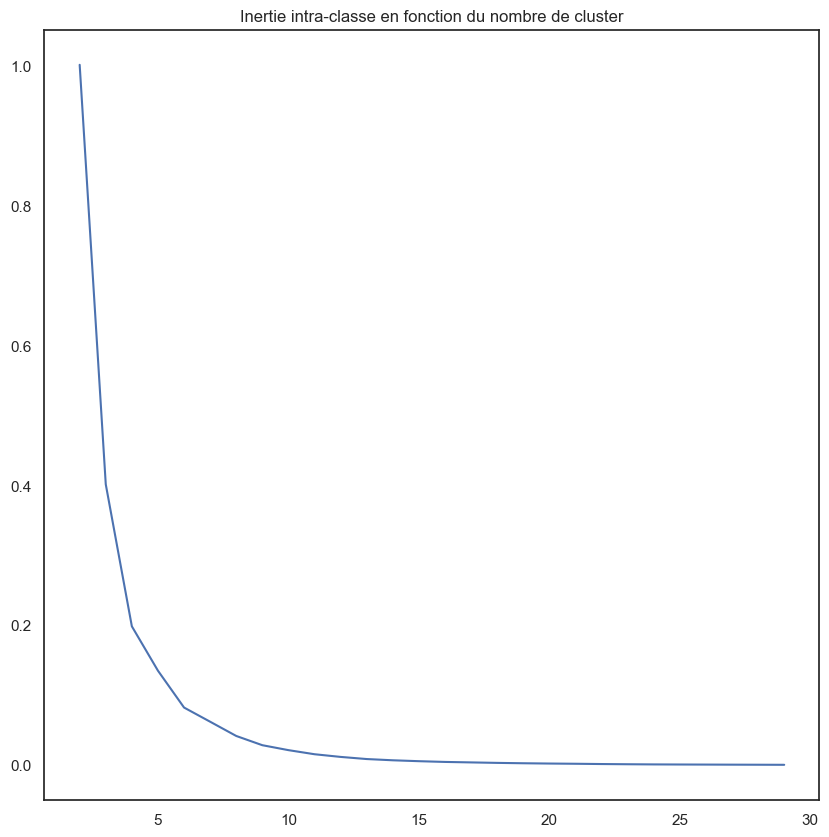

In [340]:
###on sait que l’inertie intra-classe  diminue lorsque K augmente
###choix de K : recherche d’un coude dans la décroissance de l'inertie :

from sklearn import cluster

a=[]
for i in range(2,30):
    kmeans = cluster.KMeans(n_clusters=i) 
    kmeans.fit(reduced_data_lle) 
    a.append(kmeans.inertia_)
    
plt.figure(figsize=(10,10))
plt.plot(range(2,30), a)
plt.title("Inertie intra-classe en fonction du nombre de cluster")
plt.show()

### Tracé de l'inertie en fonction du nombre de cluster

#### ACP

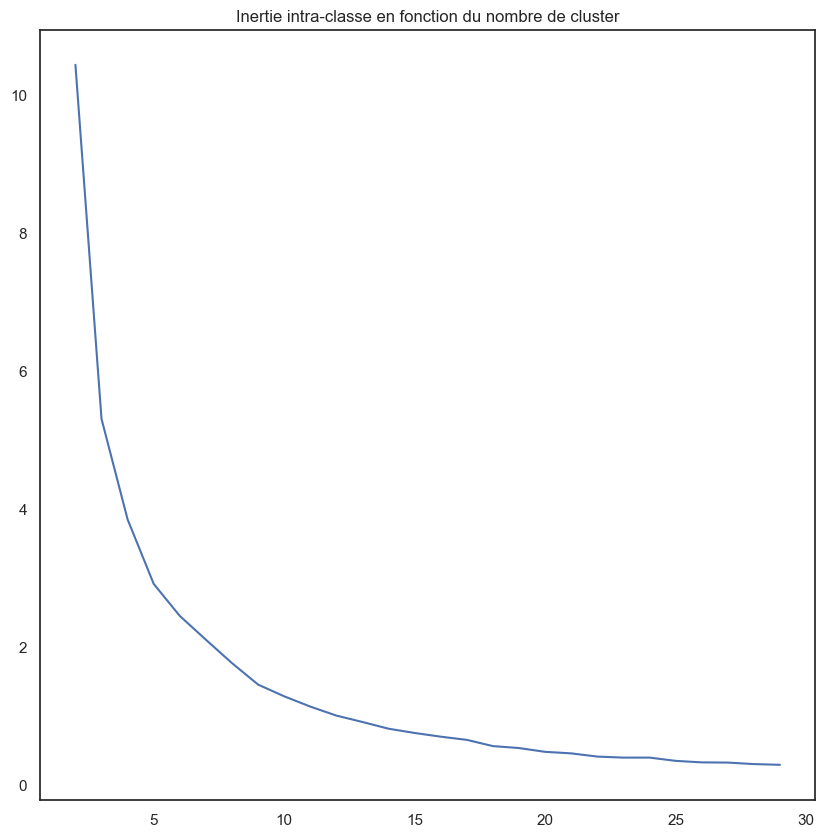

In [341]:
###on sait que l’inertie intra-classe  diminue lorsque K augmente
###choix de K : recherche d’un coude dans la décroissance de l'inertie :

from sklearn import cluster

a=[]
for i in range(2,30):
    kmeans = cluster.KMeans(n_clusters=i) 
    kmeans.fit(reduced_data_acp) 
    a.append(kmeans.inertia_)
    
plt.figure(figsize=(10,10))
plt.plot(range(2,30), a)
plt.title("Inertie intra-classe en fonction du nombre de cluster")
plt.show()

### Tracé de l'inertie en fonction du nombre de cluster

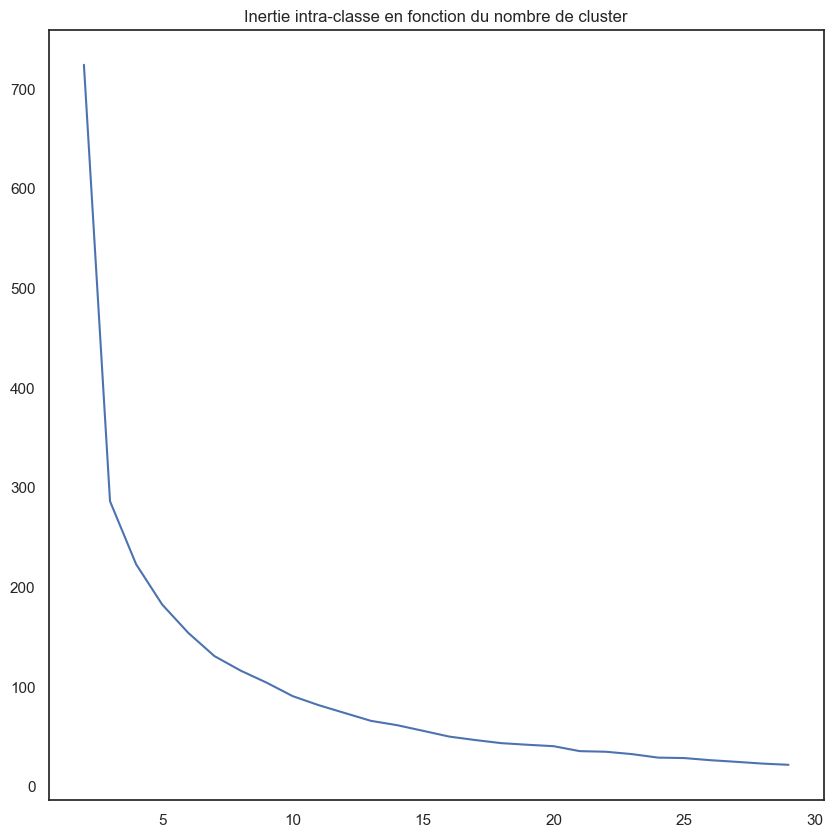

In [342]:
###on sait que l’inertie intra-classe  diminue lorsque K augmente
###choix de K : recherche d’un coude dans la décroissance de l'inertie :

from sklearn import cluster

a=[]
for i in range(2,30):
    kmeans = cluster.KMeans(n_clusters=i) 
    kmeans.fit(reduced_data_lda) 
    a.append(kmeans.inertia_)
    
plt.figure(figsize=(10,10))
plt.plot(range(2,30), a)
plt.title("Inertie intra-classe en fonction du nombre de cluster")
plt.show()

### Tracé de l'inertie en fonction du nombre de cluster

On peut donc choisir k=3.

vériffions la concordance du résultat avec la métrique silouhette:

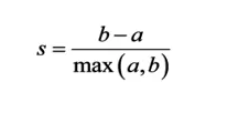

+ a la moyenne des distances aux autres observations du même cluster (cad la moyenne intra-cluster).
+ b la distance moyenne au cluster le plus proche.

Ce coefficient peut varier entre -1 et +1. Un coefficient proche de +1 signifie que l’observation est située bien à l’intérieur de son propre cluster, tandis qu’un coefficient proche de 0 signifie qu’elle se situe près d’une frontière ; enfin, un coefficient proche de -1 signifie que l’observation est associée au mauvais cluster. 
Comme pour l’inertie il est judicieux d’afficher l’évolution du coefficient en fonction du nombre de clusters comme ci-dessous :

#### LLE

[0.72878972 0.79839561 0.81652877 0.82010146 0.82186269 0.82350352
 0.83177479 0.83456975 0.83763504 0.6212401  0.61988959 0.62167224
 0.62170125 0.58159488 0.58441651 0.59704803 0.59765253 0.58848659
 0.57832765 0.59500324 0.57238266 0.59135472 0.57343579 0.57633249
 0.5696066  0.52935877 0.52234909 0.53819375 0.51846919 0.53293702]


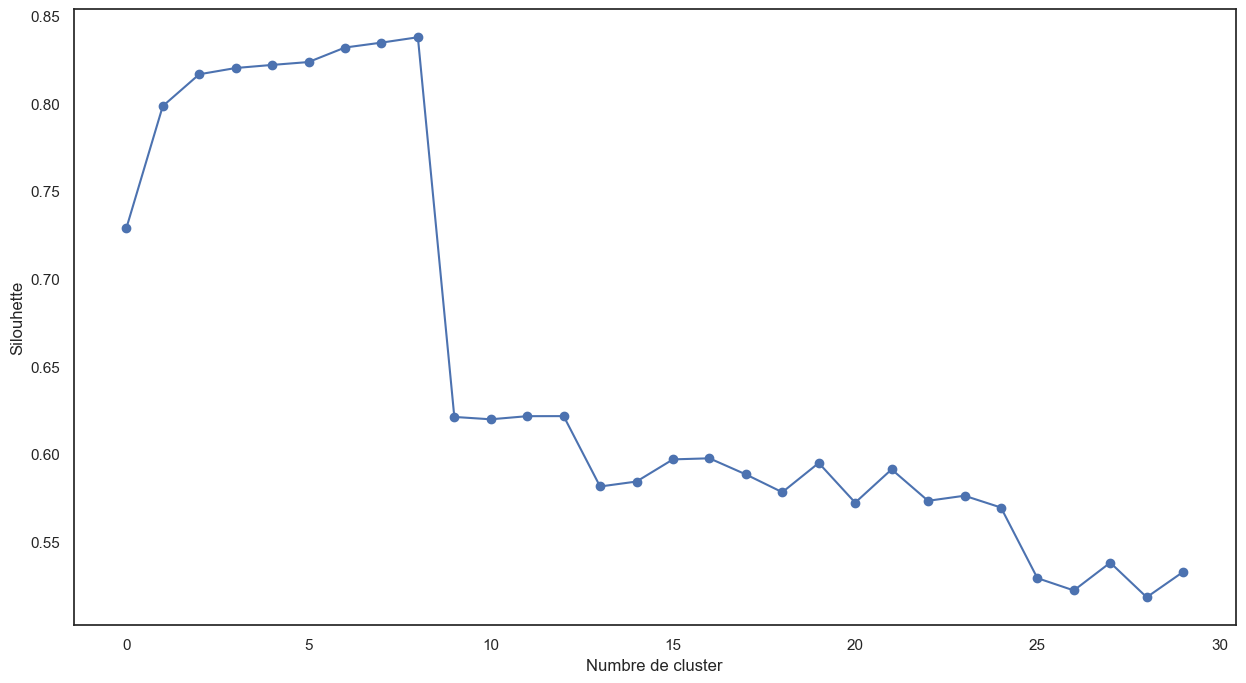

In [343]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 30

res = np.arange(30,dtype="double")
for k in np.arange(30):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(reduced_data_lle)
    res[k] = metrics.silhouette_score(reduced_data_lle,km.labels_)
    
print(res)

#graphique
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(range(0,30),res,'-o')
plt.xlabel('Numbre de cluster')
plt.ylabel('Silouhette')
plt.show()

#### ACP

[0.66583946 0.56538417 0.52694253 0.44839772 0.44725438 0.4363963
 0.44417191 0.45067109 0.43063465 0.43762189 0.41945899 0.45338229
 0.42268083 0.42423334 0.42916073 0.43797002 0.43653302 0.43142312
 0.44356092 0.43266338 0.42646855 0.42326128 0.40996786 0.41399254
 0.40395694 0.41860982 0.41256719 0.40024371 0.40767287 0.40181041]


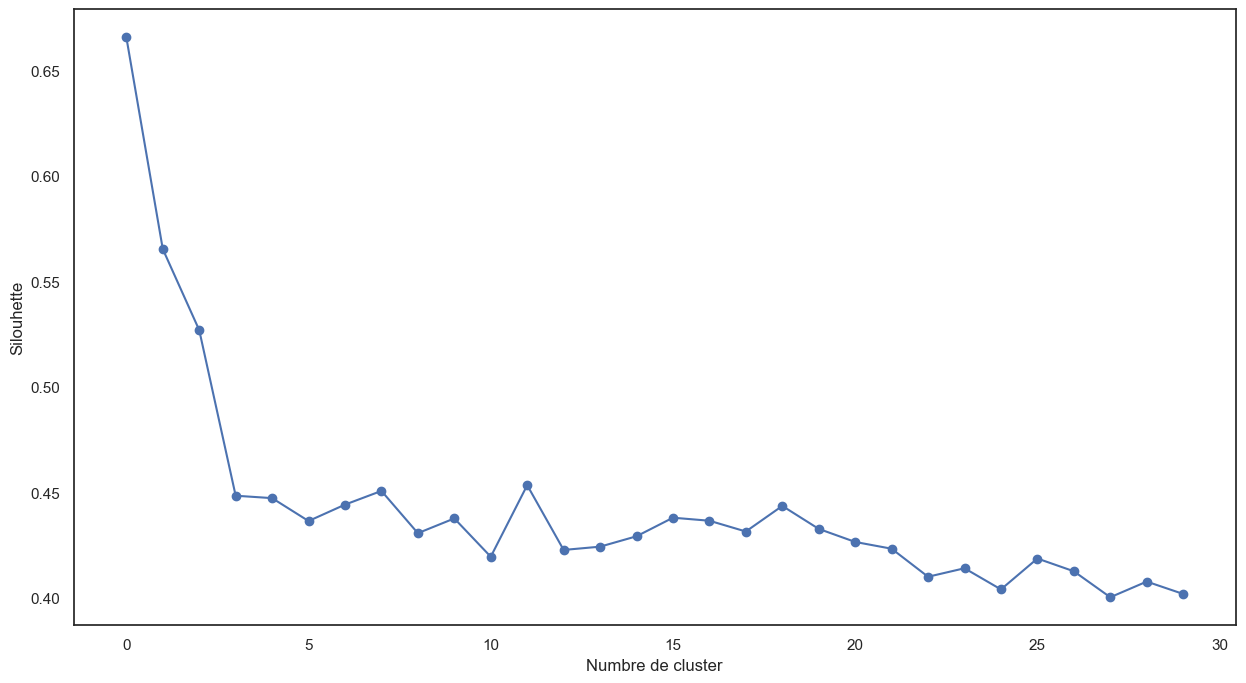

In [344]:
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 30

res = np.arange(30,dtype="double")
for k in np.arange(30):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(reduced_data_acp)
    res[k] = metrics.silhouette_score(reduced_data_acp,km.labels_)
    
print(res)

#graphique
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(range(0,30),res,'-o')
plt.xlabel('Numbre de cluster')
plt.ylabel('Silouhette')
plt.show()

#### LDA

[ 0.76829427  0.54642758  0.41105842  0.26320337  0.22633283  0.18572511
  0.14067593  0.1015266   0.09243546  0.01985453  0.0465455   0.06011548
  0.05151077  0.0117664   0.02615394 -0.00723038 -0.03612184  0.01046036
 -0.00485535 -0.01857852 -0.06137533 -0.08717129 -0.06551396 -0.05097313
 -0.08185726 -0.08159694 -0.114576   -0.08726053 -0.14255148 -0.11091413]


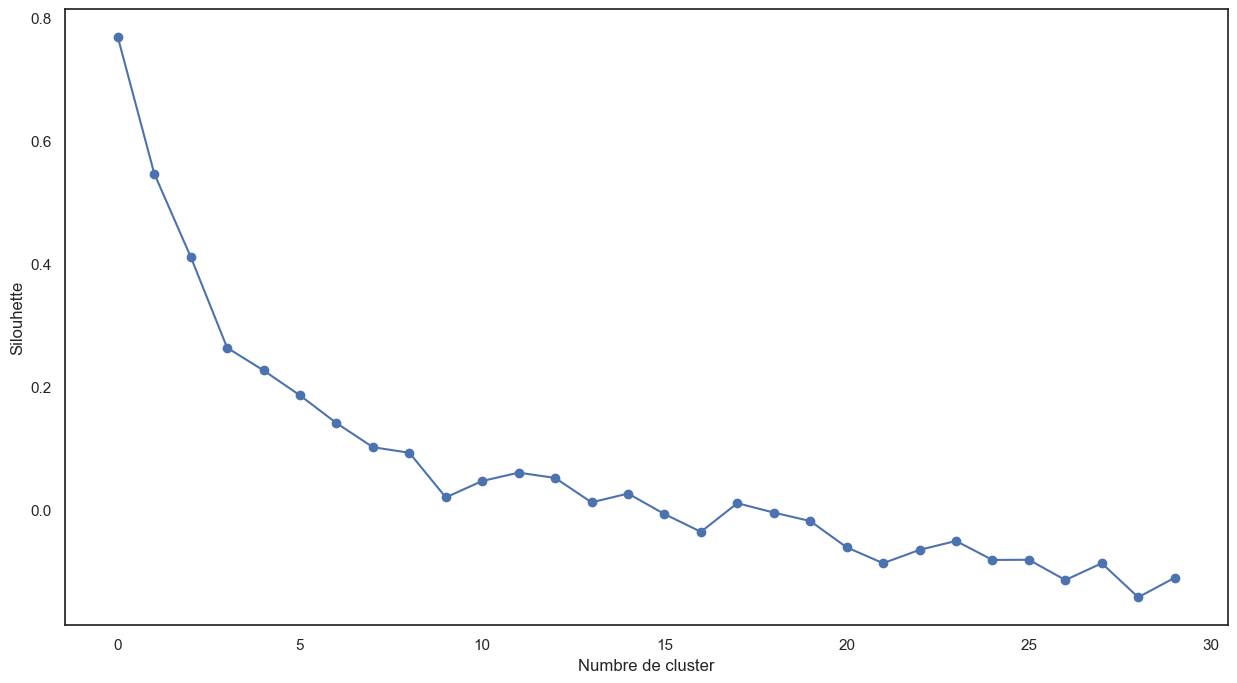

In [345]:
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 30

res = np.arange(30,dtype="double")
for k in np.arange(30):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(reduced_data_acp)
    res[k] = metrics.silhouette_score(reduced_data_lda,km.labels_)
    
print(res)

#graphique
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(range(0,30),res,'-o')
plt.xlabel('Numbre de cluster')
plt.ylabel('Silouhette')
plt.show()

### On constate donc que toutes les observations se trouvent à l'intérieur de leurs clusters

### K means clustering with LLE data

In [346]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_data_lle)
lle_labels = kmeans.labels_

In [347]:
lle_labels

array([2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

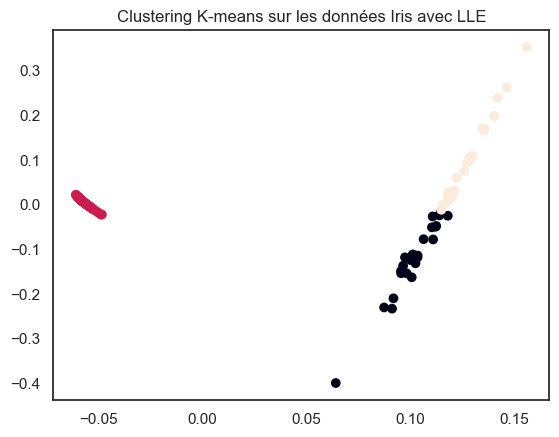

In [348]:
plt.scatter(reduced_data_lle[:, 0], reduced_data_lle[:, 1], c=lle_labels)
plt.title("Clustering K-means sur les données Iris avec LLE")
plt.show()

In [349]:
# Calcul du score de silhouette
silhouette_avg = metrics.silhouette_score(reduced_data_lle, lle_labels)
silhouette_avg

0.798395611290537

### K means clustering with ACP data

In [350]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_data_acp)
acp_labels = kmeans.labels_

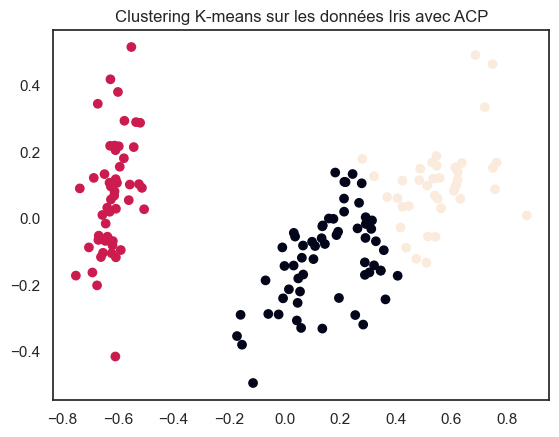

In [351]:
plt.scatter(reduced_data_acp[:, 0], reduced_data_acp[:, 1], c=acp_labels)
plt.title("Clustering K-means sur les données Iris avec ACP")
plt.show()

In [352]:
# Calcul du score de silhouette
silhouette_avg = metrics.silhouette_score(reduced_data_acp, acp_labels)
silhouette_avg

0.5653841740568702

### K means clustering with LDA data

In [353]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_data_lda)
lda_labels = kmeans.labels_

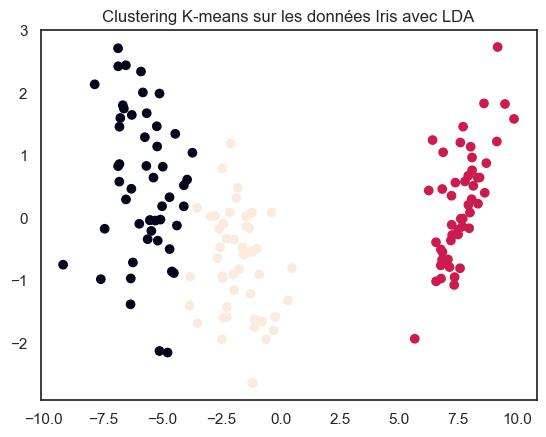

In [354]:
plt.scatter(reduced_data_lda[:, 0], reduced_data_lda[:, 1], c=lda_labels)
plt.title("Clustering K-means sur les données Iris avec LDA")
plt.show()

In [355]:
# Calcul du score de silhouette
silhouette_avg = metrics.silhouette_score(reduced_data_lda, lda_labels)
silhouette_avg

0.6558160584290523

### Movies suggestion with LLE and cosinus similarity

In [72]:
best_lle_model_mock = {
    'n_neighbors': 30,
    'n_components': 3  
}

# Pipeline pour LLE
pipeline = Pipeline([
    ('scaling', MinMaxScaler()),
    ('lle', LocallyLinearEmbedding(**best_lle_model_mock)),
])

# Dimensionality Reduction using LLE
reduced_data_lle = pipeline.fit_transform(tfidf_matrix.toarray())
print(reduced_data_lle.shape)
print(reduced_data_lle)

(4264, 3)
[[ 6.68987198e-05 -7.05643289e-04 -4.09983258e-04]
 [ 6.38065766e-05 -7.39759366e-04 -3.93803737e-04]
 [ 6.31954121e-05 -6.96472161e-04 -3.83257102e-04]
 ...
 [ 6.79535208e-05 -6.82208975e-04 -4.04833103e-04]
 [ 9.45979371e-05 -7.45344255e-04 -3.84670738e-04]
 [ 6.92281185e-05 -7.00856858e-04 -4.10615304e-04]]


In [82]:
# Fonction pour recommander des films basée sur les données LLE
def recommend_movies(title, reduced_data, movies, top_n=5):
    
    message = ""
    etat = True
    similar_movies = None
    title = title.lower()
    
    titles= [t.lower() for t in movies_df['title'].tolist()]
    
    if len(titles)>0 :
        if title in titles :
            title_index = titles.index(title)
            cosine_similarities = cosine_similarity([reduced_data[title_index]], reduced_data)
            similar_indices = np.argsort(-cosine_similarities[0])
            similar_movies = [movies_df['title'].iloc[i] for i in similar_indices[1:top_n+1]]    
        else :
            message="Nous n'avons pas trouvé de films similaires réessayez autre chose!!!"
            etat = False
            
    else :
        message="Nous n'avons pas trouvé de films similaires réessayez autre chose!!!"
        etat = False
        
    return etat, message, similar_movies

# Exemple d'utilisation
title_to_recommend = "Inception"  # Remplacez par le titre souhaité
recommended_movies = recommend_movies(title_to_recommend, reduced_data_lle, movies_df)
print(recommended_movies)

[2709 2477 2904 ... 3641 3640 3639]
(True, '', ['SemanaSanta', 'TheConfirmation', 'AnotherForever', 'Awake', 'Kalakalappu'])


La réduction des données avec Locally Linear Embedding (LLE), permet d'améliorer les recommandations basées sur la similarité cosinus. LLE peut être particulièrement utile car on a vectorisé non seulement les titres mais aussi d'autres caractéristiques textuelles des films (comme les descriptions, les genres, les réalisateurs, etc.), car il aide à préserver les relations locales dans un espace à dimension réduite.

Voici comment nous allons intégrer les données réduites par LLE dans le processus de recommandation :

    Vectorisation des Données Textuelles : Au lieu de se limiter aux titres, on peut aussi inclure d'autres colonnes textuelles et utiliser TfidfVectorizer pour transformer ces textes en vecteurs TF-IDF.

    Application de LLE : On réduit la dimensionnalité des vecteurs TF-IDF avec LLE. Cela nous donnera une représentation à faible dimension de chaque film.

    Calcul de la Similarité Cosinus : On utilise la similarité cosinus pour mesurer la similarité entre les films dans l'espace réduit par LLE. Cela peut capter des nuances de similarité qui ne sont pas évidentes dans les espaces à haute dimension.

    Recommandation de Films : Enfin on identifie et on recommande les films les plus similaires au film donné en fonction de leur similarité cosinus dans l'espace LLE.

In [74]:
#Application pratique

In [75]:
fenetre=Toplevel()
fenetre.title("NETFLIX")


def clear():
    for widget in cadre.winfo_children():
        widget.grid_forget()
        

def get_movie_details(title, dataset):

    # Recherche du film dans le dataset
    movie_data = dataset[dataset['title'] == title]

    # Vérification si le film est trouvé
    if not movie_data.empty:
        title = movie_data.iloc[0]['title'],
        duration = movie_data.iloc[0]['duration'],
        date = movie_data.iloc[0]['release_year'],
        genre = movie_data.iloc[0]['listed_in']
            
        return title, genre, duration, date
    else:
        return f"No details found for movie: {title}"
        
        
def callback():
    film=ligne_texte.get()
    clear()
    message=""
    durees=list()
    sorties=list()
    genres=list()
    titres=list()
    state=False
    cadre.pack(fill=BOTH)
    
    cadre.grid_columnconfigure(0, weight=1)
    cadre.grid_columnconfigure(1, weight=1)
    cadre.grid_columnconfigure(2, weight=1)
    cadre.grid_columnconfigure(3, weight=1)

    state, message, recommanded_movies = recommend_movies(film, reduced_data_lle, movies_df)
    
    if(state==True):
        for i in range(len(recommanded_movies)):
            titre, genre, duree, sortie = get_movie_details(recommanded_movies[i], movies_df)
            Label(cadre, text=f"Titre: {titre[0]}").grid(row=i, column=0, sticky='w', padx=(10, 0), pady=(5, 5))
            Label(cadre, text=f"Genre: {genre}").grid(row=i, column=1, sticky='w', padx=(10, 0), pady=(5, 5))
            Label(cadre, text=f"Date de sortie: {sortie[0]}").grid(row=i, column=2, sticky='w', padx=(10, 0), pady=(5, 5))
            Label(cadre, text=f"Duree: {duree[0]} mn").grid(row=i, column=3, sticky='w', padx=(10, 0), pady=(5, 5))
    else:
        clear() 
        Label(cadre, text=message).grid(row=0, column=0, columnspan=4)

In [85]:
champ_label= Label(fenetre, height=2, width=180, borderwidth=1, text="SUGGESTION DE FILMS NETFLIX")
champ_label.pack()
from PIL import Image, ImageTk

image=Image.open("netflix.jpg")
photo=ImageTk.PhotoImage(image)
canvas=Canvas(fenetre,width=600,height=350)
canvas.create_image(0,0,anchor=NW, image=photo)
canvas.pack()
champ_label = Label(fenetre, width=40, borderwidth=1 ,text="Veuillez entrer le titre du film ")
champ_label.pack()
var_texte = StringVar()
ligne_texte = Entry(fenetre, textvariable=var_texte, width=100)
ligne_texte.pack()
bouton_valider = Button(fenetre, text="Valider", width=15,height=2, command=callback)
bouton_valider.pack()
cadre = Frame(fenetre, width=500,height=576, borderwidth=1)
ligne_texte.focus_set()


fenetre['bg'] = '#49A'
fenetre.mainloop()

[2709 2477 2904 ... 3641 3640 3639]
